## União de dados SNIS e DATASUS para o estudo do saneamento relacionado a problemas de saude

In [141]:
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [142]:
%matplotlib inline
rcParams['figure.figsize'] = 16, 8
sns.set_style('whitegrid')

In [143]:
path = 'Dados_tratados_snis.csv'
df_snis = pd.read_csv(path)


path = '20211123104000-internacoes_totais_por_doencas_de_veiculacao_hidrica_painelsaneamento_org_br (1).xlsx'
df_datasus = pd.read_excel(path)


In [144]:
df_snis.drop(df_snis.tail(1).index,inplace=True)
df_snis['Código do Município'] = df_snis['Código do Município'].astype(float)

df_datasus.rename(columns={'municipio_codigo':'Código do Município'}, inplace=True)
df = pd.merge(df_snis, df_datasus, how = 'inner', on = 'Código do Município')

In [145]:
df_2019 = df[df['Ano de Referência'].str.contains("2019")==True]


In [146]:
df_ana = df_2019[['Município', 'Estado', 'AG005 - Extensão da rede de água','ES004 - Extensão da rede de esgotos', 2019]]
df_ana.rename(columns={2019:'Doenças_por_veiculação_hidrica'}, inplace=True)

df_ana.sort_values(['ES004 - Extensão da rede de esgotos'], ascending = False, axis = 0, inplace = True)

C:\Users\Bruno Araujo Muniz\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-146-09dfdaa5b288>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ana.sort_values(['ES004 - Extensão da rede de esgotos'], ascending = False, axis = 0, inplace = True)


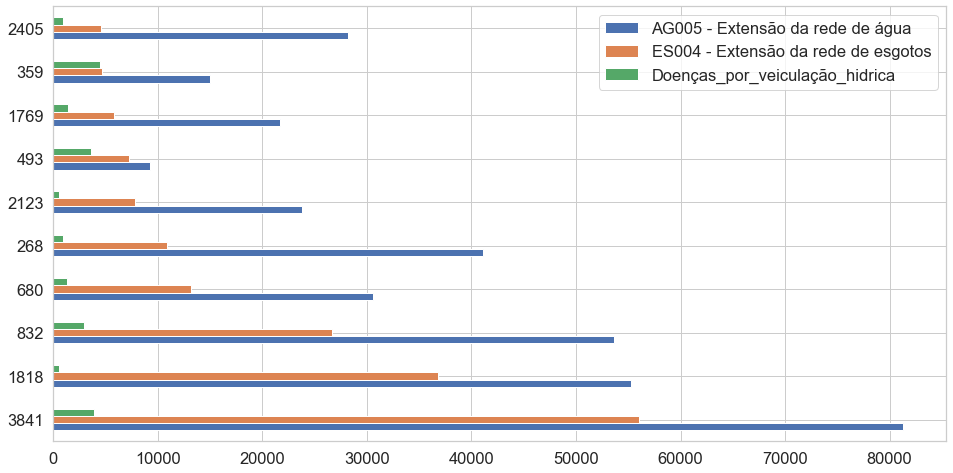

In [147]:
df_ana1 = df_ana.head(10)

df_ana1.plot(kind='barh')
plt.show()

In [148]:
aux = df_ana.Doenças_por_veiculação_hidrica.max()
df_ana.Doenças_por_veiculação_hidrica = df_ana.Doenças_por_veiculação_hidrica / aux

tmp = df_ana['ES004 - Extensão da rede de esgotos'].max()
df_ana['ES004 - Extensão da rede de esgotos'] =  df_ana['ES004 - Extensão da rede de esgotos'] / tmp

df_ana

C:\Users\Bruno Araujo Muniz\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-148-804b6392b107>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ana['ES004 - Extensão da rede de esgotos'] =  df_ana['ES004 - Extensão da rede de esgotos'] / tmp


,Município,Estado,AG005 - Extensão da rede de água,ES004 - Extensão da rede de esgotos,Doenças_por_veiculação_hidrica
3841,São Paulo,SP,81321.39,1.000000,0.885630
1818,Curitiba,PR,55300.78,0.657219,0.120460
832,Belo Horizonte,MG,53675.58,0.477142,0.660275
680,Goiânia,GO,30554.07,0.234689,0.294609
268,Salvador,BA,41071.03,0.194628,0.211144
...,...,...,...,...,...
2570,Gaspar,SC,418.81,0.000034,0.009926
384,Granja,CE,52.30,0.000033,0.007444
2688,Videira,SC,276.12,0.000026,0.010828
1722,Santa Bárbara do Pará,PA,60.00,0.000009,0.001579


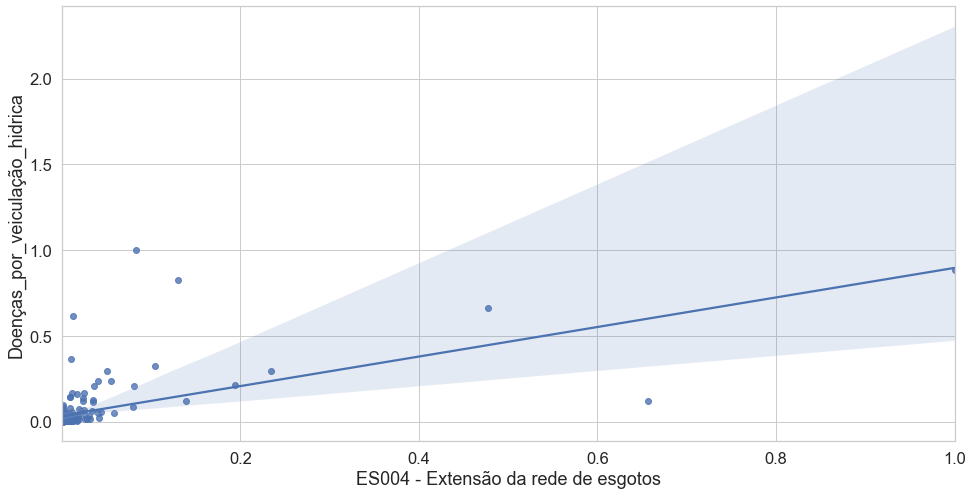

In [150]:
#df_ana.plot(kind='scatter', x='ES004 - Extensão da rede de esgotos', y='Doenças por veiculação hidrica')
ax = sns.regplot(x='ES004 - Extensão da rede de esgotos', y='Doenças_por_veiculação_hidrica', data = df_ana)